In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [167]:
df = pd.read_csv(r"C:\Users\rajan\Downloads\Datasets\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [169]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='Count'>

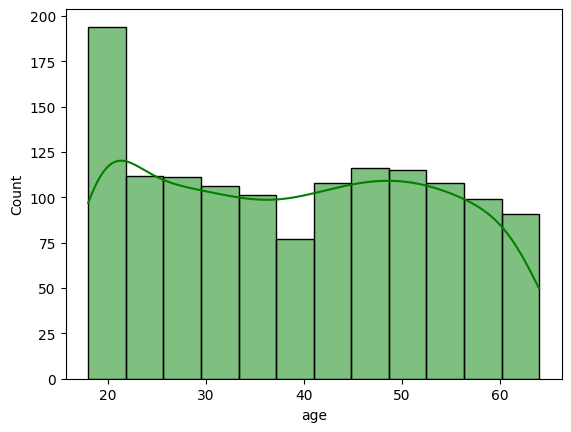

In [170]:
sns.histplot(data=df['age'], kde=True, color='green')

<Axes: xlabel='bmi', ylabel='Count'>

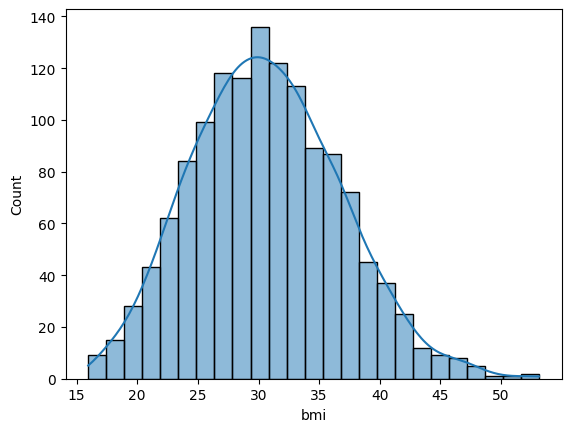

In [171]:
sns.histplot(data=df['bmi'], kde=True)

In [172]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [173]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [174]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [175]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: ylabel='charges'>

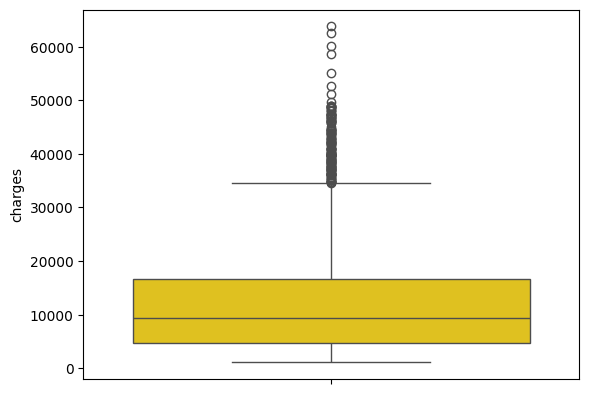

In [176]:
sns.boxplot(data=df['charges'], color='gold')

<Axes: xlabel='age', ylabel='charges'>

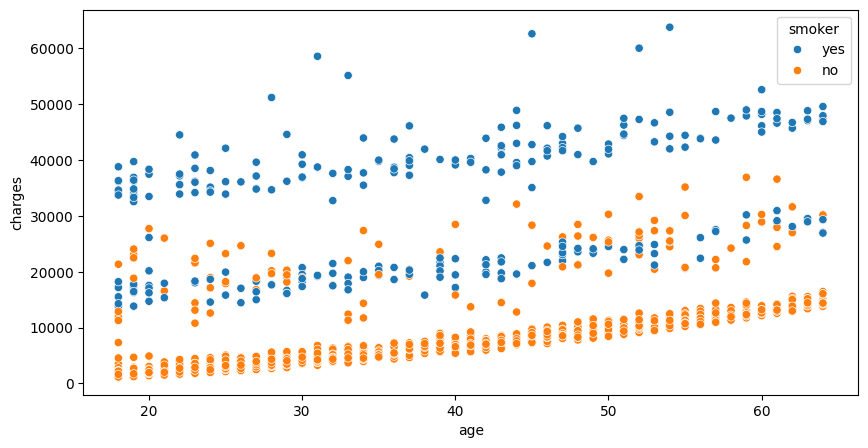

In [177]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

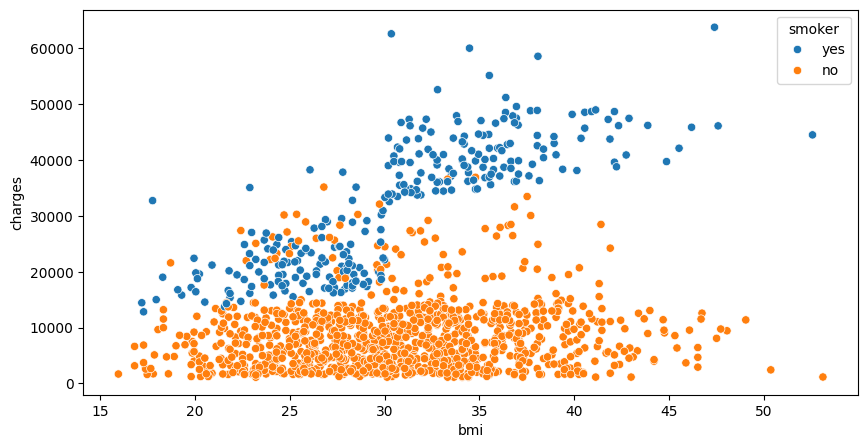

In [178]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

<Axes: xlabel='age', ylabel='bmi'>

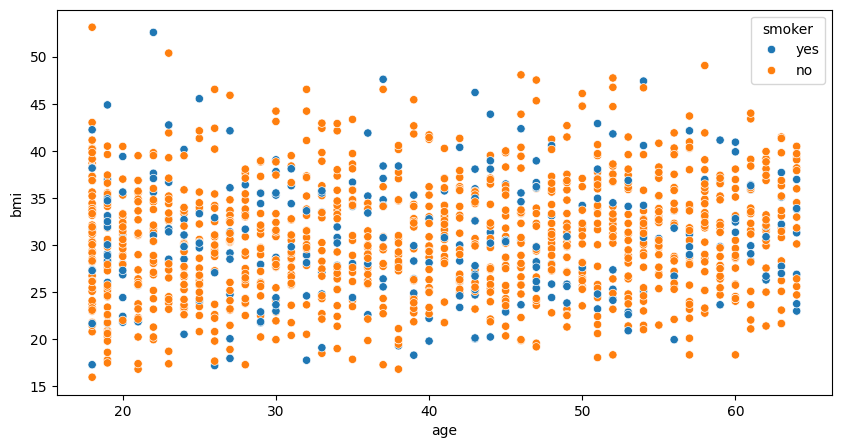

In [179]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker')

<Axes: xlabel='children', ylabel='charges'>

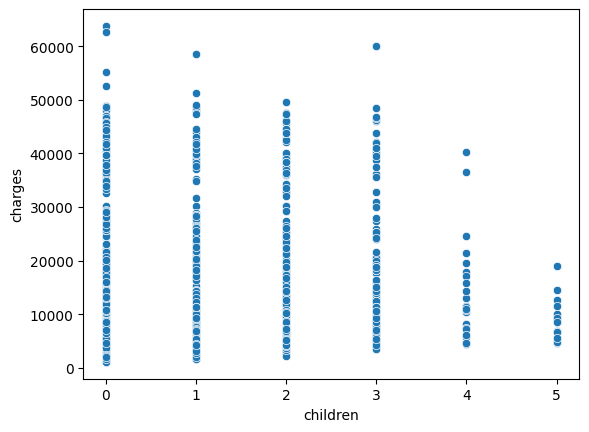

In [180]:
sns.scatterplot(data=df, x='children', y='charges')

<Axes: xlabel='region', ylabel='charges'>

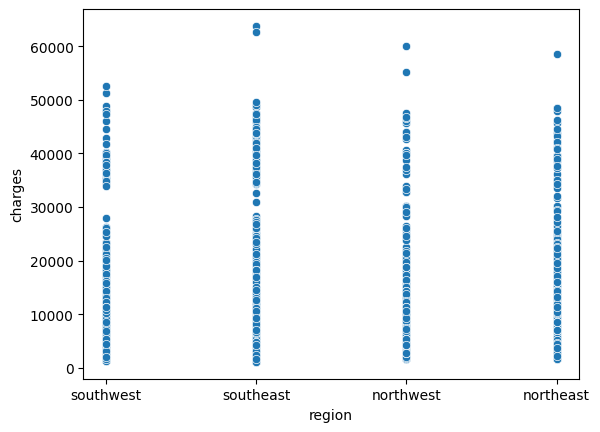

In [181]:
sns.scatterplot(data=df, x='region', y='charges')

In [182]:
numeric_df = df.copy()
numeric_df['sex'] = numeric_df['sex'].map({'male':1, 'female': 0})
numeric_df['region'] = numeric_df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})
numeric_df['smoker'] = numeric_df['smoker'].map({'yes':1, 'no':0})
numeric_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


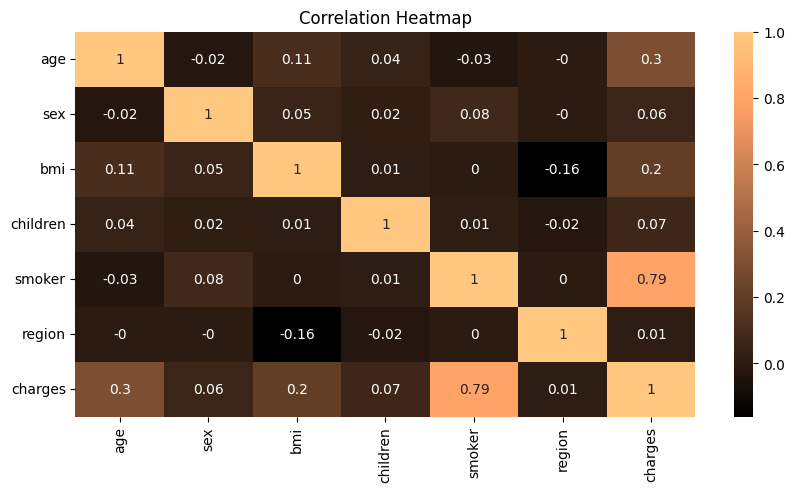

In [183]:
plt.figure(figsize=(10,5))
sns.heatmap(data=round(numeric_df.corr(),2), annot=True, cmap='copper')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [184]:
from sklearn.model_selection import train_test_split

categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()
numerical_cols.remove('charges')

X = df.iloc[:, 0:-1]   # independent variables
y = df.iloc[:, -1]     # dependent variable, i.e., charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [185]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

X_train_processed = np.hstack([X_train_encoded, X_train_scaled])
X_test_processed = np.hstack([X_test_encoded, X_test_scaled])

In [190]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [191]:
y_pred = rf.predict(X_test_processed)
y_pred

array([ 9627.2160164 ,  5567.6616345 , 28239.6470855 , 12485.6309211 ,
       34640.8607121 ,  8271.2036545 ,  2080.942686  , 14571.0440277 ,
        5621.9584237 , 10833.1828067 , 19472.2982722 ,  7156.824424  ,
        4708.8738724 , 46115.816236  , 48310.4323983 , 45453.0040653 ,
        9885.9504655 , 43561.6632979 ,  8988.1614164 , 24485.8145646 ,
        8664.990087  , 10493.9256328 ,  1814.4639066 ,  2150.5919115 ,
       11646.7293106 , 11953.7807273 , 13253.3064705 ,  8044.0701625 ,
       10901.0946654 ,  6909.34767668,  8226.9734147 , 11748.2608555 ,
        2961.6748143 ,  5773.5882623 ,  3833.1672093 ,  9655.1163723 ,
        2822.8524754 ,  8000.072817  , 23689.664104  , 39457.9569655 ,
        5740.0970459 ,  3752.9767317 , 11840.5728347 , 14780.6083099 ,
        5911.9989611 , 14867.207973  , 15552.0717563 ,  9016.534672  ,
       42032.6125494 ,  8808.1875178 , 14108.4378496 ,  2635.6956403 ,
        6874.0416864 ,  1894.3305678 , 13409.2263522 , 10554.1496014 ,
      

In [192]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", round(mse,2))
print("R2:", round(r2,2))

MSE: 21043402.98
R2: 0.86


Text(0, 0.5, 'Predicted')

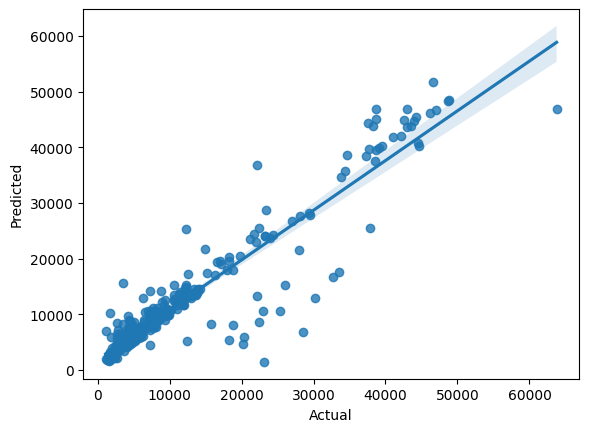

In [194]:
sns.regplot(data=df, x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')